### Integrantes:

- Julian Felipe Tolosa Villamizar - 2170107
- Juan Camilo Pertuz - 
- Diego - 

# Calculo del movimiento de n cuerpos usando fuerza de gravedad

## 1. Escribir un programa que permita simular el movimiento de n cuerpos, usando la fuerza de gravedad. Los n cuerpos se limitarán a 5 cuerpos, correspondientes a los planetas exteriores del sistema solar y al sol, usando las siguientes condiciones iniciales:

Sol: posición = (0.0, 0.0, 0.0) ; velocidad = (0.0, 0.0, 0.0); masa = 1.989e30

Júpiter: posición = (778.570e9, 0.0, 0.0); velocidad = (0.0, 13e3, 0.0); masa = 1898.19e24

Saturno: posición = (1433.529e9, 0.0, 0.0); velocidad = (0.0, 9.68e3, 0.0); masa = 568.34e24 

Urano: posición = (2872.463e9, 0.0, 0.0); velocidad = (0.0, 6.80e3, 0.0); masa = 86.813e24 

Neptuno: posición = (4495.060e9, 0.0, 0.0); velocidad = (0.0, 5.43e3, 0.0); masa = 102.413e24 

El programa debe tener estructuras de datos que permitan:
• Guardar la posición de cada partícula (planeta) para un tiempo t.
• Guardar la velocidad de cada partícula (planeta) para un tiempo t.
• Condiciones inciales y de finalización (con ejemplos): t0 = 0, dt = 86400, tfin = 86400 * 365 * 10 (Esto es una década en segundos.), G = 6.67e-11 (constante de gravitación universal).

Las aceleraciones para cada partícula se calculan de la forma:

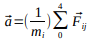

Para casos donde i<>j, con a un vector de tres dimensiones, y:

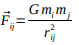

Las velocidades de cada cuerpo se calculan a partir de las aceleraciones, y las posiciones a partir de las velocidades:

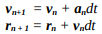


In [7]:
%%writefile n_bodies.cpp

#include <iostream>
#include <stdio.h>
#include <stdlib.h>
#include <vector>
#include <cmath>
using namespace std;

int main()
{

    //variables a utilizar
    double f[5]={0,0,0,0,0}, a[5] = {0,0,0,0,0};
    //constantes universales
    double t = 0, dt = 86400, T = 86400 * 365 * 10, G = 6.67e-11;
    // inicializacion sistema solar
    vector <vector<double>> sis_sol(5);
    vector <double> sol = { 0.0,0.0,1.989e30 };
    sis_sol[0]=sol;
    vector <double> jupiter = { 778.570e9,13e3,1898.19e24};
    sis_sol[1] = jupiter;
    vector <double> saturno = { 1433.529e9,9.68e3,568.34e24 };
    sis_sol[2] = saturno;
    vector <double> urano = { 2872.463e9,6.80e3,86.813e24 };
    sis_sol[3] = urano;
    vector <double> neptuno = { 4495.060e9,5.43e3,102.413e24 };
    sis_sol[4] = neptuno;

    cout << "Valores iniciales:" << "\n";
    cout << "t_inicial = 0 \n dt = 86400 \n G = 6.67e-11 \n t_final = 315'360.000 segundos\n";
    cout << "orden de impresion, sol(1), jupiter(2), saturno(3), urano(4) y neptuno(5). \n";
    for (int i = 0; i < 5; i++)
    {
        cout << i + 1<<"\n";
        cout << "posicion: " << sis_sol[i][0] << "\n";
        cout << "velocidad: " << sis_sol[i][1] << "\n";
        cout << "masa: " << sis_sol[i][2] << "\n";
        cout << "\n";
    }

    for (double t = 0; t < T; t++)
    {
        double f[5] = { 0,0,0,0,0 }, a[5] = { 0,0,0,0,0 };
        
        for (int i = 0; i < 5; i++)
        {
            for (int j = 0; j < 5; j++)
            {
                if (i<j || i>j)
                {
                    f[i] += (G * sis_sol[i][2] * sis_sol[j][2]) / pow(sis_sol[i][0] - sis_sol[j][0], 2);
                }
            }
            a[i] = f[i] / (sis_sol[i][2]);
        }

        for (int i = 0; i < 5; i++)
        {
            sis_sol[i][1] = sis_sol[i][1] + (a[i] * dt);
            sis_sol[i][0] = sis_sol[i][0] + (sis_sol[i][1] * dt);

        }
    }
    cout << "Valores finales:" << "\n";
    cout << "orden de impresion, sol(1), jupiter(2), saturno(3), urano(4) y neptuno(5). \n";
    for (int i = 0; i < 5; i++)
    {
        cout << i + 1 << "\n";
        cout << "posicion: " << sis_sol[i][0] << "\n";
        cout << "velocidad: " << sis_sol[i][1] << "\n";
        cout << "masa: " << sis_sol[i][2] << "\n";
        cout << "\n";
    }
}


Overwriting n_bodies.cpp


In [11]:
!gcc -o n_bodies_output.out n_bodies.cpp -lm -xc++ -lstdc++ -shared-libgcc
!./n_bodies_output.out

Valores iniciales:
t_inicial = 0 
 dt = 86400 
 G = 6.67e-11 
 t_final = 315'360.000 segundos
orden de impresion, sol(1), jupiter(2), saturno(3), urano(4) y neptuno(5). 
1
posicion: 0
velocidad: 0
masa: 1.989e+30

2
posicion: 7.7857e+11
velocidad: 13000
masa: 1.89819e+27

3
posicion: 1.43353e+12
velocidad: 9680
masa: 5.6834e+26

4
posicion: 2.87246e+12
velocidad: 6800
masa: 8.6813e+25

5
posicion: 4.49506e+12
velocidad: 5430
masa: 1.02413e+26

Valores finales:
orden de impresion, sol(1), jupiter(2), saturno(3), urano(4) y neptuno(5). 
1
posicion: 2.79751e+14
velocidad: 10.2673
masa: 1.989e+30

2
posicion: 8.08477e+17
velocidad: 29672.1
masa: 1.89819e+27

3
posicion: 1.95603e+18
velocidad: 71790.7
masa: 5.6834e+26

4
posicion: 2.04003e+18
velocidad: 74875.3
masa: 8.6813e+25

5
posicion: 5.3093e+18
velocidad: 194867
masa: 1.02413e+26



## 2. Analizar las oportunidades de paralelización del algoritmo, identificando posibles: particionamiento, comunicación y aglomeración. Explicar claramente. 

Para La paralelizacion del algoritmo poseemos solo en dos partes del codigo, una en la suma de fuerzas ya que son independientes,  y tambien al hallar las aceleraciones usando particionamiento para asi mejorar el rendimiento.

# Integral definida por método Montecarlo

## 3. Realizar un análisis de complejidad del algoritmo, obteniendo un valor de Gran O para el problema.

Revisando el programa tenemos 2 ciclos de for anidados uno con 3 for anidados y otros con 2 for anidados siguiendo el analisis de complejidad tendriamos un O(n^3) ya que el segundo ciclo con dos for es menor, la complejidad la mantiene el 3 dejandola de esa manera. una complejidad de forma exponencial. la cual dependera del tiempo en este caso que es la variable independiente.

## 4. Escribir un programa que permita aproximar el valor de una integral definida por el método de Monte Carlo. 

La integral definida será 

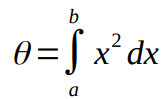

In [9]:
%%writefile montecarlo_integration.cpp

#include <iostream>
#include <cstdlib>
#include <cmath>
#include <time.h>

double f(double x);
double monteCarloEstimate(double lowBound, double upBound, int iterations);
double simpson(double a, double b, int n);


int main()
{
    double lowerBound = 1;
    double upperBound = 50;
    int iterations_arr[] = {1000000, 100000000};
	double standar_integral = simpson(lowerBound, upperBound, 1000);

    for(int iterations: iterations_arr)
    {
        clock_t tStart = clock();

        double estimate = monteCarloEstimate(lowerBound, upperBound, iterations);

		printf("Time taken: %.4fs\n", (double)(clock() - tStart)/CLOCKS_PER_SEC);

        printf("Estimate for pow(x,2) in range %.1f -> %.1f is %.2f (%i iterations)\n",
                lowerBound, upperBound, estimate, iterations);

        double error = (estimate - standar_integral) / standar_integral;
        printf("error with respect to simpson rule: %.5f\n\n", error);
    }

	return 0;
}

double f(double x)
//Function to integrate
{
	return pow(x,2);
}

double monteCarloEstimate(double lowBound, double upBound, int iterations)
//Function to execute Monte Carlo integration on predefined function
{
	double totalSum = 0;
	double randNum, functionVal;

	int iter = 0;

    for (iter = 0; iter < iterations; ++iter)
	{
		//Select a random number within the limits of integration
		randNum = lowBound + (float(rand())/RAND_MAX) * (upBound-lowBound);

		//Sample the function's values
		functionVal = f(randNum);

		//Add the f(x) value to the running sum
		totalSum += functionVal;
	}

	double estimate = (upBound-lowBound)*totalSum/iterations;

	return estimate;
}

double simpson(double a, double b, int n)
//Function to calculate definite integrals with simpson method
{
	double h, x[n+1], sum = 0;
	int j;
	h = (b-a)/n;
	
	x[0] = a;
	
	for(j=1; j<=n; j++)
	{
		x[j] = a + h*j;
	}
	
	for(j=1; j<=n/2; j++)
	{
		sum += f(x[2*j - 2]) + 4*f(x[2*j - 1]) + f(x[2*j]);
	}
	
	return sum*h/3;
}


Writing montecarlo_integration.cpp


In [10]:
!gcc -o montecarlo_integration_output.out montecarlo_integration.cpp -lm -xc++ -lstdc++ -shared-libgcc
!./montecarlo_integration_output.out

Time taken: 0.0282s
Estimate for pow(x,2) in range 1.0 -> 50.0 is 41663.37 (1000000 iterations)
error with respect to simpson rule: -0.00007

Time taken: 2.8304s
Estimate for pow(x,2) in range 1.0 -> 50.0 is 41666.82 (100000000 iterations)
error with respect to simpson rule: 0.00001



## 5. Analizar las oportunidades de paralelización del algoritmo. Identificando posibles: particionamiento, comunicación y aglomeración. Explicar claramente.


Se podría repartir el número de iteraciones del único for encontrado en el método montecarlo entre la cantidad total de procesadores que haya dispoibles para dividir la carga de procesamiento dejando una variable compartida sobre la que se sumarán los resultados de cada iteración.

## 6. Realizar un análisis de complejidad del algoritmo, obteniendo un valor de Gran O para el problema.


El algoritmo la aproximación de integral definida con método montecarlo tiene un solo iterador for, el cual contiene solo operaciones lineales, por lo que el, lo que nos indica que el problema tiene un nivel de complejidad Big(O) de n (crecimiento lineal). Esto puede comprobarse en la ejecución del código donde al multiplicar por 100 el número de iteraciones el tiempo de ejecución también aumenta 100 veces.